Mounted at /content/drive


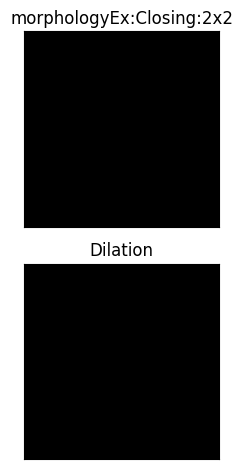

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
img = cv2.imread(r'/content/drive/MyDrive/XRAY_COVID_150/COVID/C (10).png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Missing part: Define 'kernel' and perform morphological closing to get 'sure_bg'
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2000)
sure_bg = cv2.dilate(closing, kernel, iterations=3)

plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
